In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

C:\Users\shashi.kumar11\AppData\Local\Continuum\anaconda3\envs\CNN_practice\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = pd.read_csv('train.csv').as_matrix()

C:\Users\shashi.kumar11\AppData\Local\Continuum\anaconda3\envs\CNN_practice\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [3]:
from tensorflow.core.framework import graph_pb2

In [4]:
graph_def = graph_pb2.GraphDef()

In [5]:
def load_graph():
    with open('./checkpoints/frozen_graph.pb', "rb") as f:
        graph_def.ParseFromString(f.read())
        with tf.Graph().as_default() as graph:
            tf.import_graph_def(graph_def, name="")
            return graph

In [6]:
frozen_graph = load_graph()

In [7]:
with tf.Session(graph=frozen_graph) as sess:
    # Get placeholder and output tensors.
    # Tensor names are derived from the operation that produced them
    # We named operations while building the graph NOT tensors.
    input_ph = tf.get_default_graph().get_tensor_by_name('input_image:0')
    #labels_ph = tf.get_default_graph().get_tensor_by_name('labels:0')
    #learning_rate_ph = tf.get_default_graph().get_tensor_by_name('learning_rate:0')
    output_prediction = tf.get_default_graph().get_tensor_by_name('predictions:0')
    
    # Select 5 random images
    indices = np.random.randint(0,len(data),[5])
    X = (data[indices,1:]-127)/127
    y = data[indices,0].reshape([-1,1])
    
    predictions = sess.run(output_prediction,feed_dict={input_ph:X})
    y_predicted = np.argmax(predictions,axis=1).flatten()
    print(y_predicted)


[7 2 8 5 3]


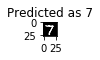

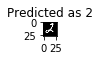

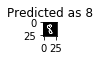

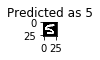

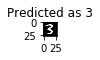

In [8]:
for i in range(len(X)):
    plt.figure(figsize=(0.25,0.25))
    plt.imshow(X[i].reshape([28,28]),cmap='gray')
    plt.title('Predicted as {}'.format(y_predicted[i]))
    plt.show()